In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your dataset path

# Drop class labels and normalize the data
features = data.drop(columns=["Broad_Class", "Broad_Class_Encoded"], errors='ignore')
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

# Run DBSCAN
eps_value = 4
min_samples_range = range(4, 10)
silhouette_scores_dbscan_eps_04 = {}

for min_samples in min_samples_range:
    dbscan_model = DBSCAN(eps=eps_value, min_samples=min_samples)
    labels = dbscan_model.fit_predict(normalized_data)
    if len(set(labels)) > 1 and -1 in labels:
        silhouette_scores_dbscan_eps_04[min_samples] = silhouette_score(normalized_data, labels, metric='euclidean')
    else:
        silhouette_scores_dbscan_eps_04[min_samples] = None

# Display results
silhouette_scores_dbscan_eps_04_df = pd.DataFrame(
    list(silhouette_scores_dbscan_eps_04.items()),
    columns=["Min Samples", "Silhouette Score"]
)
print(silhouette_scores_dbscan_eps_04_df)


   Min Samples  Silhouette Score
0            4          0.394956
1            5          0.414916
2            6          0.414916
3            7          0.414916
4            8          0.414916
5            9          0.414916


In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label columns
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Optional - Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for clustering
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform K-Means for a range of k values (4 to 10)
k_values = range(4, 11)
silhouette_scores_kmeans_minmax = {}

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_model.fit_predict(reduced_data)  # Use reduced_data if PCA is applied
    silhouette_scores_kmeans_minmax[k] = silhouette_score(reduced_data, labels)  # Use reduced_data here as well

# Step 6: Convert results to a DataFrame for better presentation
silhouette_scores_kmeans_minmax_df = pd.DataFrame(
    list(silhouette_scores_kmeans_minmax.items()), 
    columns=["Number of Clusters", "Silhouette Score"]
)

# Step 7: Display the Silhouette Scores
print("Silhouette Scores for K-Means with Min-Max Scaling:")
print(silhouette_scores_kmeans_minmax_df)


Silhouette Scores for K-Means with Min-Max Scaling:
   Number of Clusters  Silhouette Score
0                   4          0.831204
1                   5          0.683528
2                   6          0.502084
3                   7          0.477005
4                   8          0.440733
5                   9          0.452670
6                  10          0.465852


In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label columns
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Perform K-Means for a range of k values (4 to 10) using the full data
silhouette_scores_kmeans_minmax_no_pca = {}

for k in range(4, 11):  # k = 4 to 10
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_model.fit_predict(minmax_normalized_data)  # Use full data without PCA
    silhouette_scores_kmeans_minmax_no_pca[k] = silhouette_score(minmax_normalized_data, labels)

# Step 5: Convert results to a DataFrame for better presentation
silhouette_scores_kmeans_minmax_no_pca_df = pd.DataFrame(
    list(silhouette_scores_kmeans_minmax_no_pca.items()), 
    columns=["Number of Clusters", "Silhouette Score"]
)

# Step 6: Display the Silhouette Scores
print("Silhouette Scores for K-Means with Min-Max Scaling (No PCA):")
print(silhouette_scores_kmeans_minmax_no_pca_df)


Silhouette Scores for K-Means with Min-Max Scaling (No PCA):
   Number of Clusters  Silhouette Score
0                   4          0.281916
1                   5          0.204144
2                   6          0.226586
3                   7          0.239004
4                   8          0.241862
5                   9          0.237912
6                  10          0.227682


In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your dataset path

# Step 2: Drop the class label columns
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for clustering
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform DBSCAN for a range of parameters (eps and min_samples)
eps_values = [0.2, 0.4, 0.6, 0.8]  # Example eps values to test
min_samples_values = [3, 5, 7]      # Example min_samples values to test

print("DBSCAN Results (Silhouette Scores):")
print(f"{'eps':<10}{'min_samples':<15}{'silhouette_score':<20}{'num_clusters':<15}")

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_model.fit_predict(reduced_data)
        
        # Calculate Silhouette Score only if there are more than 1 cluster
        if len(set(labels)) > 1 and -1 not in labels:
            silhouette = silhouette_score(reduced_data, labels)
        else:
            silhouette = np.nan  # Not valid if only one cluster or all points are noise
        
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points
        
        # Display results for each parameter combination
        print(f"{eps:<10}{min_samples:<15}{silhouette:<20.4f}{num_clusters:<15}")


DBSCAN Results (Silhouette Scores):
eps       min_samples    silhouette_score    num_clusters   
0.2       3              0.8312              4              
0.2       5              0.8312              4              
0.2       7              0.8312              4              
0.4       3              0.7171              2              
0.4       5              0.7171              2              
0.4       7              0.7171              2              
0.6       3              0.7171              2              
0.6       5              0.7171              2              
0.6       7              0.7171              2              
0.8       3              nan                 1              
0.8       5              nan                 1              
0.8       7              nan                 1              


DBSCAN Results for eps=0.2:
   min_samples  silhouette_score  num_clusters
0            5          0.831204             4
1            6          0.831204             4
2            7          0.831204             4
3            8          0.831204             4
4            9          0.831204             4


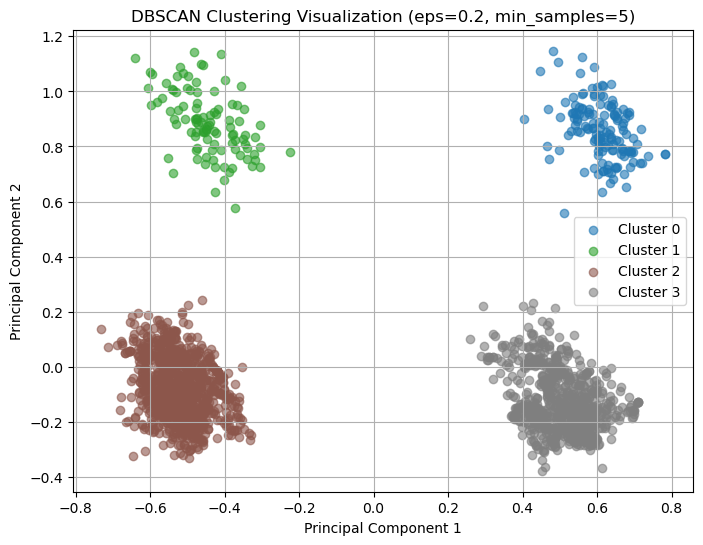

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your dataset path

# Step 2: Drop the class label columns
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform DBSCAN for eps=0.2 and min_samples in range 5 to 9
min_samples_range = range(5, 10)
dbscan_results = []

for min_samples in min_samples_range:
    dbscan_model = DBSCAN(eps=0.2, min_samples=min_samples)
    labels = dbscan_model.fit_predict(reduced_data)  # Use PCA-reduced data

    # Calculate Silhouette Score if more than 1 cluster
    if len(set(labels)) > 1 and -1 not in labels:
        silhouette = silhouette_score(reduced_data, labels)
    else:
        silhouette = None  # Invalid if there's only one cluster or all points are noise

    dbscan_results.append({
        'min_samples': min_samples,
        'silhouette_score': silhouette,
        'num_clusters': len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
    })

# Step 6: Display DBSCAN Results
dbscan_results_df = pd.DataFrame(dbscan_results)
print("DBSCAN Results for eps=0.2:")
print(dbscan_results_df)

# Step 7: Visualize Clusters for min_samples=5 (example)
optimal_min_samples = 5
dbscan_model = DBSCAN(eps=0.2, min_samples=optimal_min_samples)
labels = dbscan_model.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Plot noise points
        color = 'k'
        label_name = 'Noise'
    else:
        color = plt.cm.tab10(label / len(unique_labels))
        label_name = f'Cluster {label}'

    cluster_points = reduced_data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name, alpha=0.6)

plt.title(f"DBSCAN Clustering Visualization (eps=0.2, min_samples={optimal_min_samples})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your dataset path

# Step 2: Drop the class label columns
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform DBSCAN for eps=0.2 and min_samples in range 5 to 9
# min_samples_range = range(5, 10)
min_samples_range = 5
dbscan_results = []

for min_samples in min_samples_range:
    dbscan_model = DBSCAN(eps=0.2, min_samples=min_samples)
    labels = dbscan_model.fit_predict(reduced_data)  # Use PCA-reduced data

    # Calculate Silhouette Score if more than 1 cluster
    if len(set(labels)) > 1 and -1 not in labels:
        silhouette = silhouette_score(reduced_data, labels)
    else:
        silhouette = None  # Invalid if there's only one cluster or all points are noise

    dbscan_results.append({
        'min_samples': min_samples,
        'silhouette_score': silhouette,
        'num_clusters': len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
    })

# Step 6: Display DBSCAN Results
dbscan_results_df = pd.DataFrame(dbscan_results)
print("DBSCAN Results for eps=0.2:")
print(dbscan_results_df)

# Step 7: Analyze Feature Means for Clusters (for min_samples=5)
optimal_min_samples = 5
dbscan_model = DBSCAN(eps=0.2, min_samples=optimal_min_samples)
labels = dbscan_model.fit_predict(minmax_normalized_data)  # Use normalized data to analyze features
data['Cluster'] = labels  # Add cluster labels to the original data

# Exclude non-numeric columns before calculating cluster means
numeric_columns = features.select_dtypes(include=['number']).columns  # Select only numeric columns
numeric_data = data[numeric_columns]
numeric_data['Cluster'] = labels  # Add cluster labels to numeric data

# Calculate feature means for each cluster, excluding noise points (-1)
cluster_analysis = numeric_data[numeric_data['Cluster'] != -1].groupby('Cluster').mean()
print("\nCluster Feature Means (Fixed for Numeric Data):")
print(cluster_analysis)


# # Exclude noise points (-1) and calculate feature means for each cluster
# cluster_analysis = data[data['Cluster'] != -1].groupby('Cluster').mean()
# print("\nCluster Feature Means:")
# print(cluster_analysis)

# Step 8: Visualize Clusters for min_samples=5
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Plot noise points
        color = 'k'
        label_name = 'Noise'
    else:
        color = plt.cm.tab10(label / len(unique_labels))
        label_name = f'Cluster {label}'

    cluster_points = reduced_data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name, alpha=0.6)

plt.title(f"DBSCAN Clustering Visualization (eps=0.2, min_samples={optimal_min_samples})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


TypeError: 'int' object is not iterable


Cluster Feature Means (eps=0.2, min_samples=9):
         Gender        Age    Height      Weight  FAVC      FCVC       NCP  \
Cluster                                                                      
0           1.0  24.476270  1.709789   81.565526   1.0  2.037057  2.927419   
1           0.0  39.474814  1.543098   77.819041   1.0  2.006620  2.993861   
2           1.0  25.961508  1.787326  110.770093   1.0  2.189245  2.948236   
3           1.0  21.182725  1.623109   69.976672   1.0  2.000000  1.011288   
4           0.0  23.509842  1.686591  120.669358   1.0  3.000000  3.000000   
5           0.0  24.251868  1.585894   78.237970   1.0  2.001067  1.026771   
6           1.0  22.278414  1.827735   85.580592   1.0  2.023951  2.983875   
7           0.0  19.998895  1.531883   41.923152   1.0  2.922900  1.040254   
8           1.0  17.484913  1.820910   59.311655   1.0  2.626124  3.923561   
9           0.0  19.491853  1.596771   45.636715   0.0  2.964858  2.986976   
10          1.0

/var/folders/xd/1cx7bln162168tj7px8z33s80000gn/T/ipykernel_79004/574854865.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Cluster'] = labels  # Add cluster labels to numeric data


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

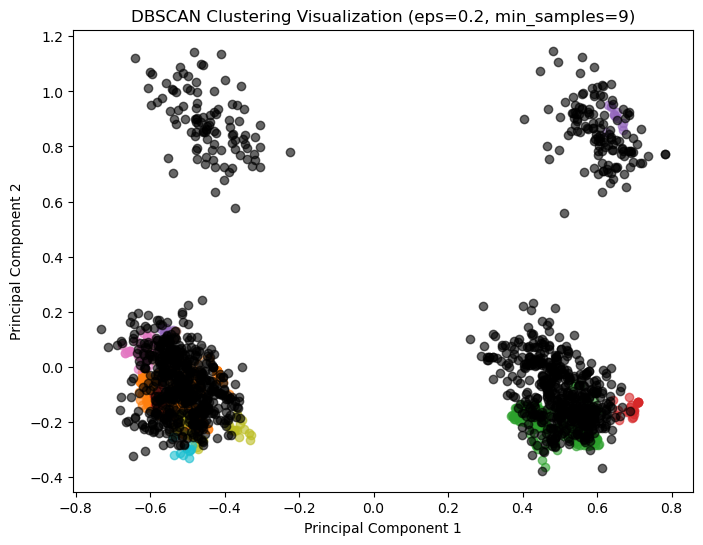

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your dataset path

# Step 2: Drop the class label columns
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=3)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform DBSCAN for eps=0.2 and min_samples=9
dbscan_model = DBSCAN(eps=0.2, min_samples=9)
labels = dbscan_model.fit_predict(minmax_normalized_data)  # Use normalized data for feature analysis

# Add cluster labels to the original dataset
data['Cluster'] = labels

# Step 6: Exclude noise points (-1) and calculate feature means for each cluster
numeric_columns = features.select_dtypes(include=['number']).columns  # Select only numeric columns
numeric_data = data[numeric_columns]
numeric_data['Cluster'] = labels  # Add cluster labels to numeric data
cluster_analysis = numeric_data[numeric_data['Cluster'] != -1].groupby('Cluster').mean()

# Display the feature means for each cluster
print("\nCluster Feature Means (eps=0.2, min_samples=9):")
print(cluster_analysis)

# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Plot noise points
        color = 'k'
        label_name = 'Noise'
    else:
        color = plt.cm.tab10(label / len(unique_labels))
        label_name = f'Cluster {label}'

    cluster_points = reduced_data[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label_name, alpha=0.6)

plt.title(f"DBSCAN Clustering Visualization (eps=0.2, min_samples=9)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.zlabel("Principal Component 3")
plt.legend()
plt.grid(True)
plt.show()
